# Practica de Visualización

Un dataset de NOAA está almacenado en el archivo `data/fb441e62df2d58994928907a91895ec62c2c42e6cd075c2700843b89.csv`. Este es el dataset que utilizaremos para la práctica.

Nota: Los datos para esta práctica forman parte de un dataset perteneciente a The data for this assignment comes from a subset of The National Centers for Environmental Information (NCEI) [Daily Global Historical Climatology Network](https://www1.ncdc.noaa.gov/pub/data/ghcn/daily/readme.txt) (GHCN-Daily). El GHCN-Daily se compone de registros climáticos diarios de miles de estaciones de la superficie terrestre en todo el mundo.

Cada fila en el archivo de datos corresponde a una sola observación.

Nos proporciona las siguientes variables:

- **id** : código de identificación de la estación
- **date** : fecha en formato YYYY-MM-DD (por ejemplo: 2012-01-24 = 24 de enero de 2012)
- **element** : indica el tipo de medición
    - **TMAX** : Temperatura máxima
    - **TMIN** : Temperatura mínima
- **value**: valor de la temperatura (en décimas de grados centígrados)

## Indicaciones

1. Lee la documentación y familiarícese con el conjunto de datos, luego escriba un código python que arroje un gráfico lineal de las temperaturas máximas y mínimas récord por día del año durante el período 2005-2014. El área entre las temperaturas máximas y mínimas récord de cada día debe estar sombreada.
2. Superponga una dispersión de los datos de 2015 para cualquier punto (máximos y mínimos) para los cuales se superó el récord de diez años (2005-2014) máximo o mínimo histórico en 2015.
3. Debes tener cuidado con los días bisiestos (es decir, el 29 de febrero), es totalmente razonable eliminar estos puntos del conjunto de datos para esta visualización.
4. ¡Haz que la imagen sea agradable! Considera problemas como leyendas, etiquetas y líneas en demasía.

Los datos proporcionados están cerca de **Ann Arbor, Michigan, Estados Unidos**.

## Observaciones

Tarea pensada en conjunto con la compañera de curso Leonor Bentancor

In [4]:
import pandas as pd
import matplotlib.pyplot as plt

In [5]:
df = pd.read_csv('../data/fb441e62df2d58994928907a91895ec62c2c42e6cd075c2700843b89.csv')

In [51]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 165085 entries, 0 to 165084
Data columns (total 4 columns):
 #   Column      Non-Null Count   Dtype         
---  ------      --------------   -----         
 0   ID          165085 non-null  object        
 1   Date        165085 non-null  datetime64[ns]
 2   Element     165085 non-null  object        
 3   Data_Value  165085 non-null  int64         
dtypes: datetime64[ns](1), int64(1), object(2)
memory usage: 5.0+ MB


In [52]:
df['Date'] = pd.to_datetime(df['Date'])
df['Date'].min()
df['Date'].max()

Timestamp('2015-12-31 00:00:00')

In [131]:
df_2005_2014 = df[(df['Date'].dt.year >= 2005) & (df['Date'].dt.year <= 2014)]

In [133]:

df_2005_2014 = df_2005_2014[~((df_2005_2014['Date'].dt.month == 2) &
                                (df_2005_2014['Date'].dt.day == 29))]  # Excluyo cuando hay año bisiesto

df_2005_2014['DayOfYear'] = df_2005_2014['Date'].dt.strftime('%m-%d')  # Creo variable día mes-dia para poder agrupar

t_min_records =  df_2005_2014[df_2005_2014['Element'] == 'TMIN']  # Filtro por tipo de elemento TMIN
t_max_records = df_2005_2014[df_2005_2014['Element'] == 'TMAX']  # Filtro por tipo de elemento TMAX

In [134]:
t_min_group = t_min_records.groupby(['DayOfYear'])['Data_Value'].min()  # Busco el mínimo por día

In [135]:
t_min_group

DayOfYear
01-01   -160
01-02   -267
01-03   -267
01-04   -261
01-05   -150
        ... 
12-27   -138
12-28   -166
12-29   -150
12-30   -144
12-31   -150
Name: Data_Value, Length: 365, dtype: int64

In [136]:
t_max_group = t_max_records.groupby(['DayOfYear'])['Data_Value'].max()  # Busco el máximo por día

In [137]:
t_max_group

DayOfYear
01-01    156
01-02    139
01-03    133
01-04    106
01-05    128
        ... 
12-27    189
12-28    194
12-29    128
12-30    117
12-31    139
Name: Data_Value, Length: 365, dtype: int64

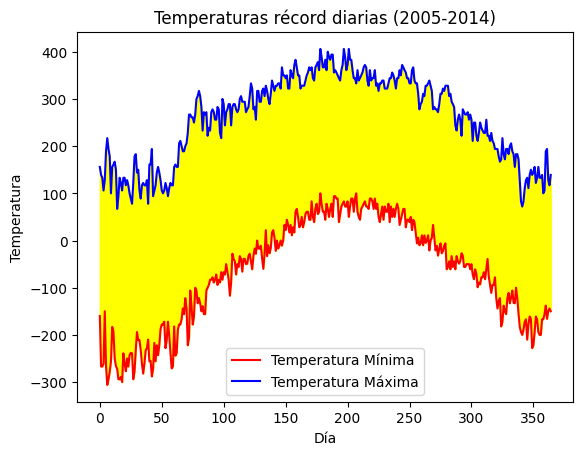

In [145]:
plt.plot(range(len(t_min_group)), t_min_group.values, color='r', label='Temperatura Mínima')  # Hago un plot de temperatura minima en rangos de día para que quede mejor visualmente
plt.plot(range(len(t_max_group)), t_max_group.values, color='b', label='Temperatura Máxima')  # Hago un plot de temperatura máxima en rangos de día
plt.fill_between(range(len(t_min_group)), t_min_group.values, t_max_group.values, alpha=1, color='yellow')  # Agrego el área entre ambas líneas
plt.title('Temperaturas récord diarias (2005-2014)')
plt.xlabel('Día')
plt.ylabel('Temperatura')
plt.legend()
plt.show()

In [139]:
df_2015 = df[df['Date'].dt.year == 2015]  # Filtro datos para 2015 excluyendo 29 de febrero si es bisiesto
df_2015 = df_2015[~((df_2015['Date'].dt.month == 2) & (df_2015['Date'].dt.day == 29))]
df_2015['DayOfYear'] = df_2015['Date'].dt.strftime('%m-%d')


In [141]:
t_min_2015 = df_2015[df_2015['Element'] == 'TMIN']
t_max_2015 = df_2015[df_2015['Element'] == 'TMAX']

In [142]:
t_min_2015_group = t_min_2015.groupby('DayOfYear')['Data_Value'].min()  # Busco mínimos y máximos para este año
t_max_2015_group = t_max_2015.groupby('DayOfYear')['Data_Value'].max()

In [143]:
records_min = t_min_2015_group[t_min_2015_group < t_min_group]  # Si hay mínimos o máximos récord en 2015 los guardo
records_max = t_max_2015_group[t_max_2015_group > t_max_group]

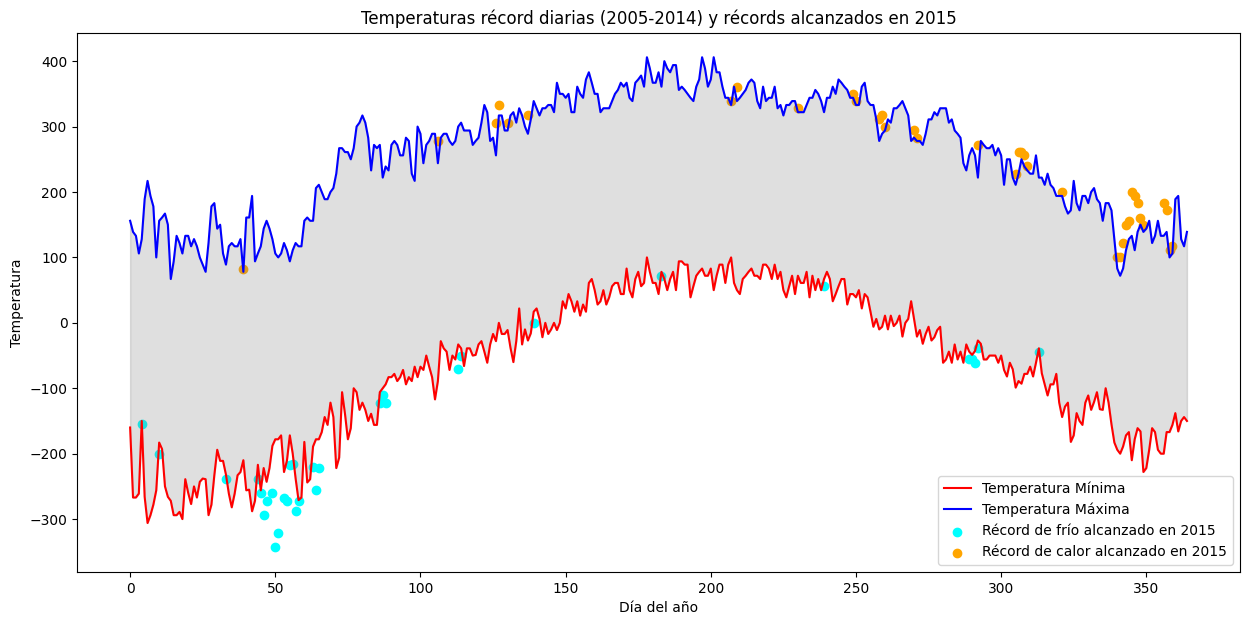

In [146]:
plt.figure(figsize=(15, 7))

plt.plot(range(len(t_min_group)), t_min_group.values, color='r', label='Temperatura Mínima')
plt.plot(range(len(t_max_group)), t_max_group.values, color='b', label='Temperatura Máxima')
plt.xlabel('Día')
plt.ylabel('Temperatura')


min_posiciones = []
for dia in records_min.index: # Encontrar las posiciones en el eje x de estos días
    posicion = list(t_min_group.index).index(dia)
    min_posiciones.append(posicion)

plt.scatter(min_posiciones, records_min.values,  # Marco los puntos cuando hubo mínio récord en 2015
            color='cyan', marker='o',
            label='Récord de frío alcanzado en 2015')

max_posiciones = []

for dia in records_max.index:
    posicion = list(t_max_group.index).index(dia)
    max_posiciones.append(posicion)

plt.scatter(max_posiciones, records_max.values,
            color='orange', marker='o',
            label='Récord de calor alcanzado en 2015')


plt.xlabel('Día del año')
plt.ylabel('Temperatura')
plt.title('Temperaturas récord diarias (2005-2014) y récords alcanzados en 2015')
plt.fill_between(range(len(t_min_group)), t_min_group.values, t_max_group.values, alpha=0.25, color='gray')
plt.legend()
plt.show()